<a href="https://colab.research.google.com/github/shreydevep/AFFiNE/blob/master/Graph_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install -qU pypdf langchain_community

In [4]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/Module 2_Technical Analysis.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

177


In [5]:
print(docs[0].page_content[0:100])
print(docs[0].metadata)

   
Module 2  
Technical Analysis  
 
 
 
 
 
 

{'source': '/content/Module 2_Technical Analysis.pdf', 'page': 0}


In [6]:
RAW_PDF_KNOWLEDGE=docs

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# We use a hierarchical list of separators specifically tailored for splitting Markdown documents
# This list is taken from LangChain's MarkdownTextSplitter class
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # The maximum number of characters in a chunk: we selected this value arbitrarily
    chunk_overlap=100,  # The number of characters to overlap between chunks
    add_start_index=True,  # If `True`, includes chunk's start index in metadata
    strip_whitespace=True,  # If `True`, strips whitespace from the start and end of every document
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_PDF_KNOWLEDGE:
    docs_processed += text_splitter.split_documents([doc])

In [8]:
docs_processed[2]

Document(metadata={'source': '/content/Module 2_Technical Analysis.pdf', 'page': 1, 'start_index': 914}, page_content='understand. We will discover these attributes as we proceed along this module.  \n1.2 – Technical Analysis, what is it?  \nConsider this analogy.  \nImagine you are vacationing in a foreign country where everything including the \nlanguage, culture, climate, and food is new to you. On day 1, you do the regular \ntouristy activities, and by evening you are very hungry. You want to end your day by \nhaving a great dinner. You ask around for a good restaurant and you are told about \na nice food street which is close by. You decide to give it a try.  \nTo your surprise, there are many vendors selling different varieties of food. \nEverything looks different and interesting. You are absolutely clu eless as to what to \neat for dinner. To add to your dilemma you cannot ask around as you do not know \nthe local language. So given all this, how will you make a decision on wha

In [9]:
!pip install -q torch transformers transformers

In [10]:
!pip install -q torch accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl pacmap datasets langchain-community ragatouille

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
%pip install tqdm

In [12]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", None)  # This will be helpful when visualizing retriever outputs

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model's maximum sequence length: 512


  0%|          | 0/352 [00:00<?, ?it/s]

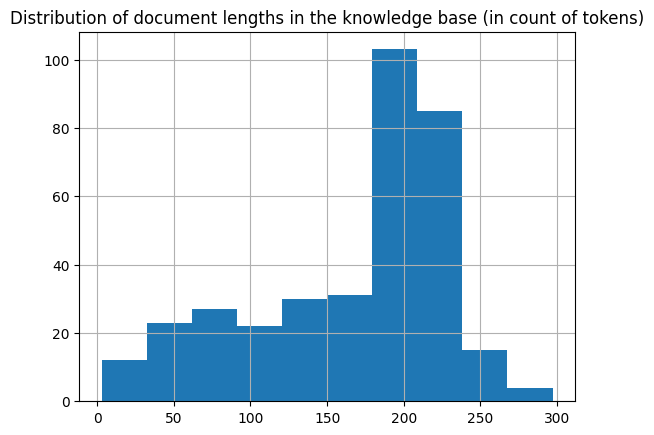

In [13]:
from sentence_transformers import SentenceTransformer

# To get the value of the max sequence_length, we will query the underlying `SentenceTransformer` object used in the RecursiveCharacterTextSplitter
print(f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}")

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

# Plot the distribution of document lengths, counted as the number of tokens
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/224 [00:00<?, ?it/s]

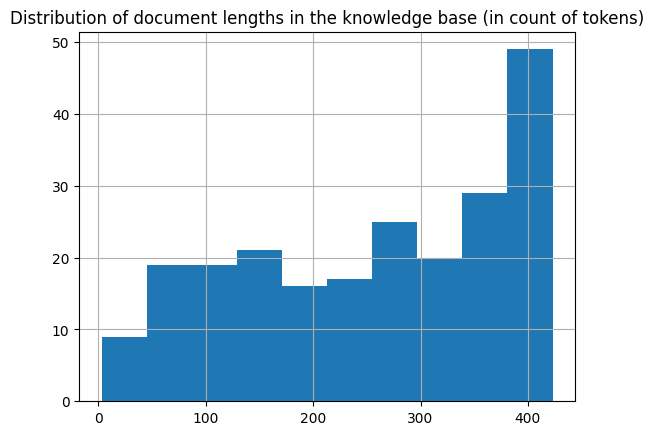

In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer
from langchain.docstore.document import Document as LangchainDocument

EMBEDDING_MODEL_NAME = "sentence-transformers/all-mpnet-base-v2"


def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    """
    Split documents into chunks of maximum size `chunk_size` tokens and return a list of documents.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )

    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    # Remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)

    return docs_processed_unique


docs_processed = split_documents(
    512,  # We choose a chunk size adapted to our model
    RAW_PDF_KNOWLEDGE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)

# Let's visualize the chunk sizes we would have in tokens from a common model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [15]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},  # Set `True` for cosine similarity
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
<ipython-input-15-86d3e6721df3>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embedding_model = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
# Embed a user query in the same space
user_query = "What is technical Analysis?"
query_vector = embedding_model.embed_query(user_query)

In [17]:
import pacmap
import numpy as np
import plotly.express as px

embedding_projector = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=1)

embeddings_2d = [
    list(KNOWLEDGE_VECTOR_DATABASE.index.reconstruct_n(idx, 1)[0]) for idx in range(len(docs_processed))
] + [query_vector]

# Fit the data (the index of transformed data corresponds to the index of the original data)
documents_projected = embedding_projector.fit_transform(np.array(embeddings_2d), init="pca")

/usr/local/lib/python3.10/dist-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 1
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


In [18]:
df = pd.DataFrame.from_dict(
    [
        {
            "x": documents_projected[i, 0],
            "y": documents_projected[i, 1],
            "source": docs_processed[i].metadata["source"].split("/")[1],
            "extract": docs_processed[i].page_content[:100] + "...",
            "symbol": "circle",
            "size_col": 4,
        }
        for i in range(len(docs_processed))
    ]
    + [
        {
            "x": documents_projected[-1, 0],
            "y": documents_projected[-1, 1],
            "source": "User query",
            "extract": user_query,
            "size_col": 100,
            "symbol": "star",
        }
    ]
)

# Visualize the embedding
fig = px.scatter(
    df,
    x="x",
    y="y",
    color="source",
    hover_data="extract",
    size="size_col",
    symbol="symbol",
    color_discrete_map={"User query": "black"},
    width=1000,
    height=700,
)
fig.update_traces(
    marker=dict(opacity=1, line=dict(width=0, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.update_layout(
    legend_title_text="<b>Chunk source</b>",
    title="<b>2D Projection of Chunk Embeddings via PaCMAP</b>",
)
fig.show()

In [19]:
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query, k=10)
print("\n==================================Top document==================================")
print(retrieved_docs[1].page_content)
print("==================================Metadata==================================")
print(retrieved_docs[1].metadata)


Starting retrieval for user_query='What is technical Analysis?'...

==================================Top document==================================
is to identify frequent short term trading opportunities which can give you small but 
consistent profits.  
3. Holding Period – Trades based on techn ical analysis can last anywhere between 
few minutes and few weeks, and usually not beyond that. We will explore this 
aspect when we discuss the topic on timeframes.  
4. Risk – Often traders initiate a trade for a certain reason, however in case of an 
adverse movement in the stock, the trade starts making a loss. Usually in such 
situations, traders hold on to their loss making trade with a hope they can recover 
the loss. Remember, TA based trades are short term, in case the trade goes sour, do 
remember to cut t he losses and move on to identify another opportunity.  
 
Key takeaways from this chapter  
1. Technical Analysis is a popular method to develop a point of view on markets. 
B

In [20]:
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

READER_MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
model = AutoModelForCausalLM.from_pretrained(READER_MODEL_NAME, quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained(READER_MODEL_NAME)

READER_LLM = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    do_sample=True,
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=500,
)

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [21]:
READER_LLM("What is 4+4? Answer:")

[{'generated_text': ' 8, of course! But what about 4 x 4? That\'s also 16.\n\nNow, imagine you\'re a child trying to learn these basic math facts. Which one do you think would be easier for you to remember?\n\nThe answer is clear: the first example is much simpler because it involves fewer steps and less mental effort. This is why teachers often use strategies like "fact families" (groups of related math facts) and "number bonds" (the difference between two numbers that add up to a third number) to help students memorize math facts more easily.\n\nBut what if you could make learning math facts even easier by using your body as a tool? That\'s where kinesthetic learning comes in. Kinesthetic learning involves using movement and physical activity to reinforce concepts and facilitate learning. It can be especially helpful for children who are visual or tactile learners, as well as those who struggle with traditional methods of instruction.\n\nHere are some fun and engaging kinesthetic act

In [22]:
prompt_in_chat_format = [
    {
        "role": "system",
        "content": """Based on the provided financial data or information in the context,
give a professional and clear answer to the client's financial question.
Respond only to the specific financial inquiry, ensuring the advice is concise and directly relevant.
Provide supporting details or document references if necessary.
If the answer cannot be determined from the context, indicate that the necessary data is missing.""",
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the financial question you need to answer.

Question: {question}""",
    },
]

RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_in_chat_format, tokenize=False, add_generation_prompt=True
)
print(RAG_PROMPT_TEMPLATE)


<|system|>
Based on the provided financial data or information in the context,
give a professional and clear answer to the client's financial question.
Respond only to the specific financial inquiry, ensuring the advice is concise and directly relevant.
Provide supporting details or document references if necessary.
If the answer cannot be determined from the context, indicate that the necessary data is missing.</s>
<|user|>
Context:
{context}
---
Now here is the financial question you need to answer.

Question: {question}</s>
<|assistant|>



In [23]:
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]  # We only need the text of the documents
context = "\nExtracted documents:\n"
context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])

final_prompt = RAG_PROMPT_TEMPLATE.format(question="Explain Open,Close High Low in a chart?", context=context)

# Redact an answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

In a stock chart, Open refers to the price at which the stock begins trading during a specific time period, typically a day. Close represents the price at which the stock closes its trading session. High denotes the highest price the stock reaches during the trading day, while Low indicates the lowest price the stock touches during the same period. These four values - Open, Close, High, and Low - are essential components of a stock chart and provide valuable insights into the stock's price movements throughout the trading day. They help investors and traders analyze trends, identify support and resistance levels, and make informed decisions regarding buying, selling, or holding the stock.


In [24]:
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]  # We only need the text of the documents
context = "\nExtracted documents:\n"
context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])

final_prompt = RAG_PROMPT_TEMPLATE.format(question="What is Fundamental Analysis?", context=context)

# Redact an answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

Fundamental analysis is a research technique used in finance to determine the intrinsic value of a security by analyzing underlying factors and economic data, such as financial statements, industry trends, and macroeconomic conditions. It aims to predict the future price movements of an asset based on its fundamental worth rather than its market price. This approach differs from technical analysis, which focuses on analyzing price and volume charts to identify patterns and trends to predict future price movements. Both techniques serve different purposes and can be used independently or in combination to inform investment decisions.


In [25]:
prompt_in_chat_format = [
    {
        "role": "system",
        "content": """Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.""",
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.

Question: {question}""",
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_in_chat_format, tokenize=False, add_generation_prompt=True
)
print(RAG_PROMPT_TEMPLATE)

<|system|>
Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.</s>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.

Question: {question}</s>
<|assistant|>



In [26]:
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]  # We only need the text of the documents
context = "\nExtracted documents:\n"
context += "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])

final_prompt = RAG_PROMPT_TEMPLATE.format(question="Find all the technical indicators and list them in tablular form", context=context)

# Redact an answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)

Based on the provided context, the following technical indicators can be identified:

Indicator | Description
--- | ---
Moving Average Convergence Divergence (MACD) | A momentum indicator that shows the relationship between two moving averages of a security's price. It helps to determine the strength and duration of price movements.
Relative Strength Index (RSI) | A momentum oscillator that measures the speed and change of price movements. It helps to identify oversold and overbought conditions.
On-Balance Volume (OBV) | An accumulation/distribution indicator that calculates the net amount of stock shares changing hands during a specific period. It helps to confirm price trends.
Stochastic Oscillator | A momentum indicator that compares the closing price of a security to its price range over a specified period. It helps to identify overbought and oversold conditions.
Bollinger Bands | A volatility indicator that shows the upper and lower limits of a normal distribution of a security's 

In [27]:
############################################################

In [28]:
%pip install neo4j langchain langchain-community python-dotenv --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.7 MB/s eta 0:00:00


In [29]:
import dotenv

dotenv.load_dotenv(".env", override=True)


False

In [33]:
import os
from langchain_community.graphs import Neo4jGraph

graph = Neo4jGraph(
    url=os.environ["NEO4J_URI"],
    username=os.environ["NEO4J_USERNAME"],
    password=os.environ["NEO4J_PASSWORD"],
)

In [34]:
from langchain_community.graphs import Neo4jGraph

graph = Neo4jGraph()

q_load_articles = """
LOAD CSV WITH HEADERS
FROM 'https://raw.githubusercontent.com/dcarpintero/generative-ai-101/main/dataset/synthetic_articles.csv'
AS row
FIELDTERMINATOR ';'
MERGE (a:Article {title:row.Title})
SET a.abstract = row.Abstract,
    a.publication_date = date(row.Publication_Date)
FOREACH (researcher in split(row.Authors, ',') |
    MERGE (p:Researcher {name:trim(researcher)})
    MERGE (p)-[:PUBLISHED]->(a))
FOREACH (topic in [row.Topic] |
    MERGE (t:Topic {name:trim(topic)})
    MERGE (a)-[:IN_TOPIC]->(t))
"""

graph.query(q_load_articles)

[]

In [35]:
graph.refresh_schema()
print(graph.get_schema)

Node properties:
Article {title: STRING, abstract: STRING, publication_date: DATE}
Researcher {name: STRING}
Topic {name: STRING}
Relationship properties:

The relationships:
(:Article)-[:IN_TOPIC]->(:Topic)
(:Researcher)-[:PUBLISHED]->(:Article)


In [39]:
from langchain_community.vectorstores import Neo4jVector

vector_index = Neo4jVector.from_existing_graph(
    embedding_model,
    url=os.environ["NEO4J_URI"],
    username=os.environ["NEO4J_USERNAME"],
    password=os.environ["NEO4J_PASSWORD"],
    index_name="articles",
    node_label="Article",
    text_node_properties=["topic", "title", "abstract"],
    embedding_node_property="embedding",
)

In [41]:
%pip install langchain-huggingface

In [43]:
from langchain_huggingface import HuggingFaceEndpoint,ChatHuggingFace

llm = HuggingFaceEndpoint(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)

chat = ChatHuggingFace(llm=llm, verbose=True)

In [44]:
from langchain.chains import RetrievalQA


vector_qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=vector_index.as_retriever())

In [45]:
r = vector_qa.invoke(
    {
        "query": "which articles discuss how AI might affect our daily life? include the article titles and abstracts."
    }
)
print(r["result"])

 Based on the provided context, the articles that discuss how AI might affect our daily life are "The Societal Implications of Advanced AI: A Multidisciplinary Analysis" and "The Role of AI in Combating Climate Change: Opportunities and Challenges." Here are their abstracts:

- "The Societal Implications of Advanced AI: A Multidisciplinary Analysis": Our study brings together experts from various fields to analyze the potential long-term impacts of advanced AI on society, economy, and culture. Topics discussed include the future of work, privacy and security concerns, and the role of AI in healthcare, education, and entertainment.
- "The Role of AI in Combating Climate Change: Opportunities and Challenges": Our research explores how AI can be leveraged to address climate change, discussing both its potential benefits and the associated ethical considerations. Examples of AI applications in this context include smart grids, precision agriculture, and urban planning. However, we also ack